# AM207 Final Paper - Decomposition of Uncertainty in Bayesian Deep Learning

### Team Members - **add research goal for Spring if wanted**

* Owen Callen
* Gabriel Pestre
* Hayden Sansum
* Nikhil Vanderklaauw

## Problem Statement

The authors of this paper \[1\] propose a method of utilizing the flexibility of a Bayesian Neural Network with Latent Variables to allow for the decomposition of Aleatoric and Epistemic Uncertainty. When performing supervised learning or reinforcement learning there are a number of ways to gain insight into the overall uncertainty, such as frequentist bootstrapping (running multiple trials) or implementing a Bayesian modeling approach to incorporate a distribution over models. Both these approaches however only provide the overall magnitude of the uncertainty and do not allow for further interrogation of where those uncertainties might be coming from. Without knowing how much of the variation is due to inherent randomness (aleatoric) or due to the lack of collected data in specific areas (epistemic) there is no way to know precisely how to improve the model. For instance would it be useful to collect more data in a certain area? Would it be useful to defer the prediction to an expert? In reinforcement learning this could be framed as, where does my agent need to explore more to maximize how much it learns about the environment? Being able to decompose uncertainty into these two core components, epistemic and aleatoric (whilst still using a complex and flexible model such as a neural network) enables practioners of data science and statistics to tackle these problems. 

Aside from this primary aim, of decomposing uncertainty, the authors are also interested in proving that the abililty to achieve this decomposition of uncertainty in this way is an inherent property of the Bayesian Neural Network with Latent Variables (BBN+LV) (originally presented in an early paper by the author \[2\]) and not an artefact of the sampling methodology. As such they attempt to show that the BNN+LV has the properties required to split epistemic from aleatoric uncertainty when using both BB-alpha (a similar method to BBVI although using an alpha divergence) and also Hamiltonian Monte Carlo (HMC).

## Context/Scope

* Why is this important?
* Why does splitting aleatoric from epistemic uncertainty matter?
* How have they framed it in terms of heteroscedastic vs bimodal noise
* What about latent variables - baby weights etc.
* Reinforcement learning - active learning - where to explore
* Novel risk sensitive criterion?

## Existing Work

Decomposition of Uncertainty in Bayesian Deep Learning, builds upon the foundations of an earlier paper by the same authors (2017) in which they explore the usefulness
of adding a random gaussian noise input in order to aid with policy search in dynamic systems. \[2\] While this architecture is not explicitly referred to as a 
BBN+LV in this paper, it is clear that this is the original proposal of such a system. The major reason cited by the authors for adding the latent variable on the input
is due to the otherwise limited nature of having the stochasticity of the system represented only by a single, additive Gaussian output noise. This prior paper also
utilizes the Wet Chicken Problem (a reinforcement learning set up, described below in Experiments) as a demonstration of the effectiveness of this new BNN+LV architecture.

In an extention to the paper under review here, the same authors also propose utilizing the decomposition of uncertainty technique to perform a sensitivity analysis 
on the aleatoric and epistemic components separately. \[4\] This natural follow up to the original two papers as it utilizes both the decomposition of uncertainty and also
the ability of the BBN+LV architecture to fix the weights and sample over multple latent variables, or alternatively fix the latent inputs and vary the weights in order
to test the different components of the uncertainty.

In addition to follow up work by the same authors, Yacoby, Pan and Doshi-Velez (2019) \[3\] also investigated the BBN+LV architecture and found issues with 
unidentifiability. They posit that the variations present in the data can be equally well learned by either the weights or the latent input variable, hence rendering
the model difficult to train and easy to overfit. This problem is specific to BNN+LVs as the latent variable, which forms part of the posterior, is not utilized when
making new predictions and is instead resampled from a standard gaussian distribution, hence the weight values (sampled from the original posterior) may no longer
be correctly aligned. We consider this to be similar to a case of fitting linear regression with two correlated features, the coefficients on these two features can 
vary by high amounts and still give the same output predictions. Removing one of the two variables from the linear model however, whilst retaining the other at it's
fixed parameter value from the original training would clearly be problematic for predictions. The authors propose a solution based around a new method of approximate
inference which relies on first training the weights and latent noise independently before training them together and penalizing their deviations from the original
modeling assumptions. While we do no go so far as to implement this new method of approximation, we do take inpiration from the idea of first fixing the noise to get
an initial set of trained weights before training both components together, as described in more details in Experiments and also in the fit method of our BNN+LV class.

A core technical development which enabled the probabilistic modeling of neural networks in a Bayesian context was the Bayes by Backprop concept introduced by Blundell
et al. \[5\] Originally proposed as an alternative method of regularization in feed forward networks to traditional techniques such as drop out, Bayes by Backprop 
proposes using an approximation to the true posterior of the neural network (an expected lower bound) and then leveraging a divergence metric to minimize the difference
between this approximation and the true posterior. This insight opened up the possibly of efficient sampling from a neural network posterior without needing to rely on
complex and slow sampling methods (such as HMC) whose convergence is not guaranteed due to the complexity of the true posterior. Further details on how "Bayes by Backprop"
enables this probabilistic training of weights can be found in our Technical Content section under "BBVI".

This paper also leans heavily upon existing literature demonstrating the use of the KNN algorithm as a method of approximating the entropy of a set of data points.
Original described by Kozachenko and Leonenko back in 1987 \[7\], before being expanded upon by Singh et al. in 2003 \[8\], this approach enables a computationally efficient
metric for estimating the amount of entropy in a system, an important component of the decomposition seeing as it needs to be be calculated at each datapoint and across
multiple different models. 

Interestingly, in our search for existing literature on the use of Entropy in decomposing uncertainties into epistemic and aleatoric components, 
a number of engineering papers had already leveraged the approach. Robertson et al's paper on Wind Turbine uncertainty \[9\] separated variables into modeling variables
and natural parameters (with the modeling variables capturing the epistemic and natural parameters capturing the aleatoric uncertainty). In a way this 
is a parallel to how Depeweg et al. splits out epistemic as uncertainty over modeling weights and aleatoric as the remaining uncertainty inherent in the data. 
Gong et al's research into hydrolic modeling \[10\] lays out this concept in a more general manner where the aleatoric uncertainty is what remains after 
attributing some component of the total uncertainty to the mutual information between the data and the output (epistemic).

In a 2017 paper by Kendall and Gal \[6\], the authors highlight how the decomposition approach proposed here can be applied to supervised learning tasks 
utilizing a standard BNN, excluding the latent variables. The authors of this paper also utilize the concepts of entropy and marginalizing over the weights
of the models sampled from the posterior. Their specific use case was to improve image classification performance in cases with high amounts of heteroscedastic
noise and conclude that their BNN implementation is successful in this regard. They do not however test this on bimodal noises cases where we suspect
the latent variable representation, proposed in the paper we are reviewing, will add significant value.

## Contribution

The contribution of this paper is threefold and centers on the uniqueness of utilizing a BNN+LV with uncertainty decompositions:

1. The specific methods (described below in our technical section) of decomposing the predictive uncertainty of a BNN+LV into epistemic and aleatoric 
uncertainties by using entropy and variance. The algorithm used to calculate the entropy of a set of data has been around since the original Kozachenko 
paper in 1987 \[8\] and the overall approach, as mentioned above, of using entropy as a method to decompose uncertainty was proposed and utilized in 
engineering at least back as far as 2013. It is in this context however, applying the decomposition methods to a BBN+LV and utilizing that to be able to 
separate the aleatoric and epistemic compnents of a neural network that are a unique contribution.

2. Demonstrating the ability of the BBN+LV, when applied with the decomposition of uncertainty approach, to separate out epistemic and aleatoric
uncertainties from even very complex functions such as those with bimodal or heteroscedastic noise. This innovation allows for practictioners to identify areas
of high epistemic noise, even for very difficult to learn functions, and therefore train models efficiently by gathering more data or further training the model in
these areas.

3. Im confused about this one - NOVEL RISK SENSITIVE CRITERION - need to research more TODO...

TODO TODO

## Technical Content

In this section we will summarize the core technical context required to understand the methodology presented in the paper and any additional methods we attempted in replicating the paper. 
Details on our specific implementation can be found in the experiments section of this paper or by reviewing our Github repository.

### BBN+LV



* this is our main piece of machinery - explain why its useful and how it works 

<img src="../imgs/BBN_LV.jpg" alt="BBN_LV" width=900>

### Entropy Decomposition 

To distinguish between the epistemic and aleatoric uncertainties, the authors required a method to decompose where the uncertainties are being introduced - either the uncertainties across the weights (epistemic) or the uncertainty inherent within the noise of the data (aleatoric). 

In the original Depeweg paper \[1\] the authors proposed two ways to perform this estimation, via entropy and via variance. In the results section of the paper, the authors only present and discuss their results in terms of the entropy and so this is the method that we will focus on reproducing. The entropy of a set of points represent how much inherent variation exists. Formally this can be calculated using the functional pdf, but in this case where our BNN+LV posterior is not a known form, it must be approximated using a technique such as K-Nearest Neighbor.

Using KNN as an approximate Entropy calculation goes back to a 1987 paper by Kozachenko & Leonenko \[7\]
although is more succinctly stated in a later 2003 paper by Singh et al \[8\] with the relevant equation being listed as (Eqn. 4). Entropy as a concept is actually a measurement of randomness and is leverged in many fields from thermodynamics to algorithms which optimize splits in a decision tree. In this specific case, the randomness (entropy) that is interesting is how much difference there is in the predictions at each input data point. K-Nearest Neighbors is therefore an obvious candidate for an approximation as it enables an efficient and fast method to calculate distances between a vector of datapoint (a set of $y*$ predictions for a given $x*$). 

This KNN approximation of the Entropy, in general form, is stated as:
$$ 
\hat{H}_n = \frac{p}{n}\sum_{i=1}^n ln(p_i) + ln\left[ \frac{\pi^{p/2}}{\Gamma(\frac{p}{2} + 1)} \right] + \gamma + ln(n-1)
$$

Where:
$$ 
p = \text{dimensionality} \quad n = \text{number of data points} \quad p_i = \text{distance to nearest neighbor} \quad \gamma = \text{Euler constant}
$$

So in essence the entropy is the average of the natural log of the distance from each point to its closest neighbour, scaled by the size and dimensionality of the problem at hand. The additional constants are related to the surface area of a hypersphere in $p$ dimensions and scales the entropy based on the overall size of the hypersphere within which the entropy is being calculated. 

Singh et al \[8\] also propose more robust methods of approximation utilizing more than just the single nearest neighbouring point but for simplicity of reproduction and to more closely match the Depeweg paper \[1\], which cites the original Kozachenko paper \[8\], we will stick to the single nearest neighbor method.

With a method for approximating the Entropy of a given set of data, we must then apply this to the BNN+LV in order to decompose the uncertainty. Naively applying the entropy calculation across the outputs of the BNN+LV however will not give us anything more than the overall uncertainty, including both aleatoric and epistemic. To decompose this we need to calculate two entropies, the overall entropy and the entropy which occurs having marginalized out the uncertainty over the weights (aleatoric uncertainty). The difference of which leaves just the epistemic uncertainty.

The formulation given in the paper for this decomposition is:
$$
\text{Overall uncertainty} = H(y*|x*)
$$
$$
\text{Aleatoric uncertainty} = \mathbb{E}_{q(W)}[H(y*|W,x*)]
$$
$$
\text{Epistemic uncertainty} = H(y*|x*) - \mathbb{E}_{q(W)}[H(y*|W,x*)]
$$

Being unable to calculate the entropies exactly though, we instead substitute in our approximation for the entropy, $\hat{H}(.)$ and calculate it as follows:
$$
\text{Overall uncertainty} = \hat{H}(y*^1,...,y*^L)
$$
$$
\text{Aleatoric uncertainty} = \frac{1}{M} \sum_{i=1}^M \hat{H}(y*^{1,W_i}, ..., y*^{L,W_i})
$$
$$
\text{Epistemic uncertainty} = \hat{H}(y*^1,...,y*^L) - \frac{1}{M} \sum_{i=1}^M \hat{H}(y*^{1,W_i}, ..., y*^{L,W_i})
$$

Where:
$$ 
L = \text{number of data points} \quad M = \text{number of different models (posterior samples)} 
$$

In simpler terms:

1. Use the KNN formula to calculate the overall entropy of a given set of output data points, $y*$ from all the models at once, this treats all predictions from each model, at a specific data point $x*$ as a single vector. This calculates the overall entropy present in the predictions.
2. Make multiple predictions using a single set of model weights, $W_i$ and calculate the entropy at each $y*$ within this model. Repeat this process for every different model individually ($W_i,...,W_M$) and average the entropy across these outcomes. By separately calculating the average of the entropy across many different models through repeated sampling of the weights, this averages out the effects of the uncertainty between models (aka marginalizes out the epistemic uncertainties leaving just the aleatoric).
3. Finally summarize the Epistemic uncertainty as $Total - Aleatoric$

### BBVI

* Why do we need BBVI - generally cover why we care about sampling from an approximate posterior then cover the BBVI implementation
* Talk about the ELBO - highlight where it differs from normal BBVI for BNN
* Highlight our posterior derivation here
* State our priors
* State our likelihood
* Lots of math and equations would be good here

### BB-alpha

While we do not go so far as to implement the BB-$\alpha$ method ourselves in this review, we do cover the details of the method here in order to understand where
our results (collected with a combination of BBVI and HMC/NUTS sampling) might differ from those found in the original paper. In the Hernandez-Lobato et al. paper \[11\]
the authors discuss the advantages and similaries of the BB-$\alpha$ technique compares to other methods such as Variational Bayes (BBVI is a specific case of VB). Of
the discussion within their paper the most notable information, for our context, are the two special cases where $\alpha = 0$ and $\alpha =\infty$.

In the case where $\alpha = 0$ the authors highlight that the alpha divergence metric is equivalent to performing KL-divergence in the reverse direction (how
we perform BBVI):
$$
lim_{\alpha \rightarrow 0} D_{\alpha} [p||q] = KL[q||p]
$$

Similarly when $\alpha = \infty$ then it becomes equivalent to the forward mode of KL-divergence:
$$
lim_{\alpha \rightarrow 0} D_{\alpha} [p||q] = KL[p||q]
$$

Reference \[11\] for details

### HMC & PYMC3

* Talk first about sampling from posterior rather than an approximation to the posterior
* This is still on approximate solution though as it never really converged to the true posterior
* Same posterior set up as BBVI? Do we need to cover something different here in terms of posterior?
* How does it work and why did we try it?

PYMC3
* Why did we try this in addition?
* What is NUTS? How does it work and how does it differ to our ordinary HMC?

In addition to using our in-house implementation of HMC to sample from the posterior, we also tried using pymc3 as a comparison approach. Though in theory an HMC sampler with pymc3 should produce similar results, we opted to use their default, "turnkey" NUTS sampler to investigate if it was able to make efficiency adjustments and produce more robust results than our HMC implementation.

NUTS, or the No-U-Turn sampler, is an extension to HMC sampling that addresses HMCs performance sensitivity to hyperparameters: step size $\epsilon$ and number of steps $L$. Misspecifications of this parameter can lead to undesireable random walk behavior or excessive computation. NUTS attempts to solve this problem by instead using a recursive tree-building algorithm that determines the number of steps by iteratively accumulating leapfrog steps by 2x on a trajectory until the trajectory experiences a U-Turn/diverges. In effect this results in varied trajectory lengths and candidate points. Since NUTS doesn't require specification of step size, it learns an optimal one for a target acceptance rate during burn-in and uses the same step size for all iterations. Overall NUTS has guarantees to be at least as efficient as vanilla HMC, and requires less tuning. 

Sources https://besjournals.onlinelibrary.wiley.com/doi/epdf/10.1111/2041-210X.12681, https://arxiv.org/pdf/1111.4246.pdf

## Experiments

We need to HIGHLIGHT:
* At least one instance of it working - aka we can kinda replicate the results and explain how we did it in detail and why
* At least one instance of it failing - where did we find it difficult to replicate or run into problems?

### Setting up BNN

In [ ]:
import sys
sys.path.append('..')
import autograd.numpy as np
import matplotlib.pyplot as plt
from utils.models import BNN, BNN_LV
from utils.plot import plot_posterior_predictive
from utils.data_gen import generate_regression_outputs
from utils.decomposition import uncertainty_decompose_entropy

In [ ]:
# Parameters to set up BNN_LV architecture
gamma = 1
sigma = 1

architecture = {'input_n':1, 
             'output_n':1, 
             'hidden_layers':[20,20],
             'biases' : [1,1,1],
             'activations' : ['relu', 'relu', 'linear'],
             'gamma':[gamma],
             'sigma':[sigma]}

bnn_lv = BNN_LV(architecture=architecture)

### Heteroscedastic Noise

* Introduction to why this toy example is important - real life situations
* What specifically is the set up here? (parameters etc.)
* Lay out the different methods we applied to it

#### Results

* Present and discuss each of the methods we used to try to decompose the uncertainty and what we found

#### Discussion

* How close were our results to theirs?
* Why?
* Anything worthy to note?

In [ ]:
y_hsc, X_hsc = generate_regression_outputs(type='hsc')

X_test_hsc = np.linspace(min(X_hsc), max(X_hsc), 100)

### HMC

In [ ]:
# HMC hsc here

### pymc3

In [ ]:
#see `` for sampling code
posterior_samples_pymc3_hsc = np.load('pymc3/hsc/hsc_run_with_z_w_trace_target9_maxtree12.npy')

<AxesSubplot:>

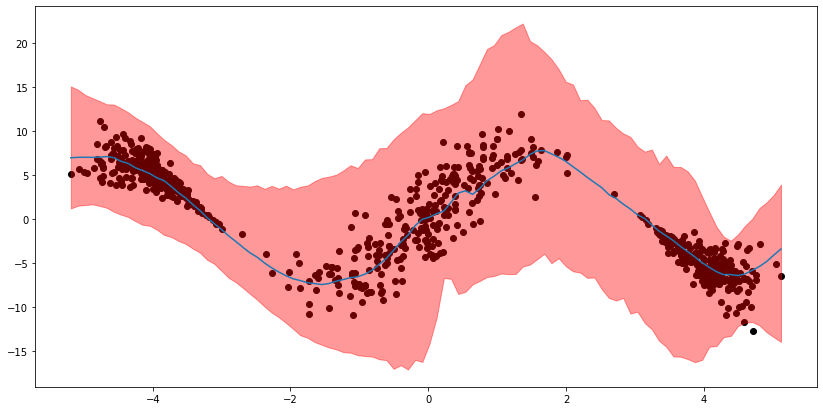

In [ ]:
plot_posterior_predictive(X_test_hsc, bnn_lv, posterior_samples_pymc3_hsc, mode='fill', ax=None, figsize=(14,7), real_x=X_hsc, real_y=y_hsc)

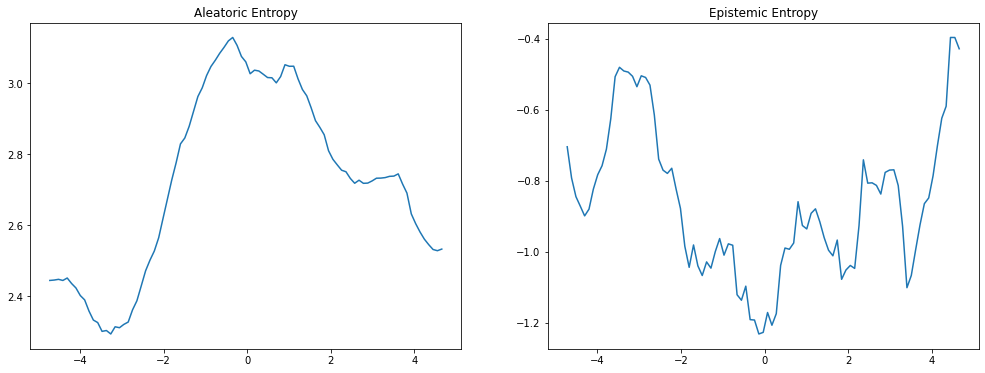

In [ ]:
epistemic_entropy_pymc3_hsc, aleatoric_entropy_pymc3_hsc =  uncertainty_decompose_entropy(bnn_lv,X_hsc, posterior_samples_pymc3_hsc,
                                                                                            S=650, N=650, N2=100, D=1, avg_window=10)
                                                                                            #IDEALLY RUN 2000, 1000, 100, 1 on local

### BBVI

In [ ]:
# BBVI hsc here

### Bimodal Noise

* Introduction to why this toy example is important - real life situations
* What specifically is the set up here? (parameters etc.)
* Lay out the different methods we applied to it

#### Results

* Present and discuss each of the methods we used to try to decompose the uncertainty and what we found

#### Discussion

* How close were our results to theirs?
* Why?
* Anything worthy to note?

In [ ]:
y_bimodal, X_bimodal = generate_regression_outputs(type='bimodal')

X_test_bimodal = np.linspace(min(X_bimodal), max(X_bimodal), 100)

### HMC

In [ ]:
# HMC bimodal here

### pymc3

In [ ]:
#see `` for sampling code
posterior_samples_pymc3_bimodal = np.load('pymc3/bimodal/bimodal_withlv_w.npy')

<AxesSubplot:>

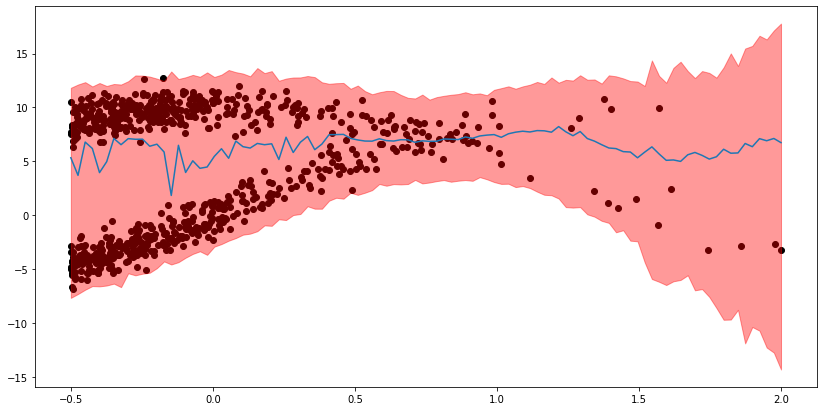

In [ ]:
plot_posterior_predictive(X_test_bimodal, bnn_lv, posterior_samples_pymc3_bimodal, mode='fill', ax=None, figsize=(14,7), real_x=X_bimodal, real_y=y_bimodal)

In [1]:
plot_posterior_predictive(X_test_bimodal, bnn_lv, posterior_samples_pymc3_bimodal, mode='points', ax=None, figsize=(14,7), real_x=X_bimodal, real_y=y_bimodal)

NameError: name 'plot_posterior_predictive' is not defined

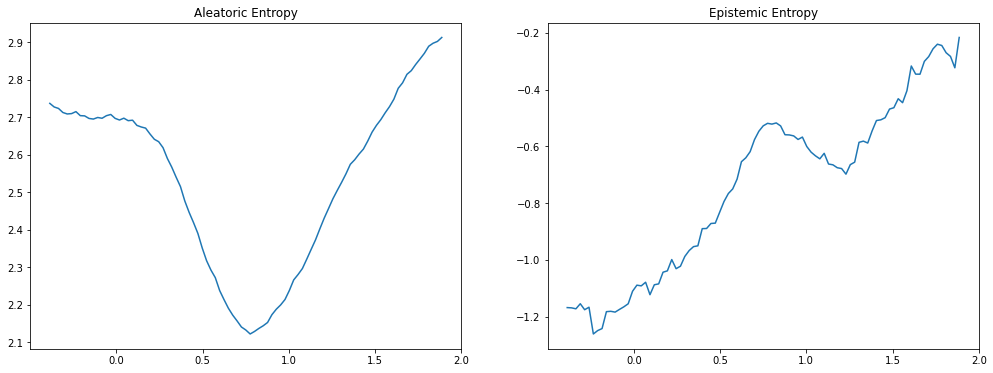

In [ ]:
epistemic_entropy_pymc3_bimodal, aleatoric_entropy_pymc3_bimodal = uncertainty_decompose_entropy(bnn_lv,X_bimodal, posterior_samples_pymc3_bimodal,
                                                                                            S=650, N=650, N2=100, D=1, avg_window=10)
                                                                                            #IDEALLY RUN 2000, 1000, 100, 1 on local

### BBVI

In [ ]:
# BBVI bimodal here

### Wet Chicken Dynamics

* Introduction to why this toy example is important - real life situations
* What specifically is the set up here? (parameters etc.)
* Lay out the different methods we applied to it

#### Results

* Present and discuss each of the methods we used to try to decompose the uncertainty and what we found

#### Discussion

* How close were our results to theirs?
* Why?
* Anything worthy to note?

## Comparing Results

Summarise the previous section in terms of what we found
* What are our high level takeaways in terms of our results
* How close did we get to replicating?
* Does it work?

## Evaluation

More about critiquing their paper
* From our investigations where are the flaws?
* Do we believe their results?
* Where would this approach fail?

## Future Work & Improvements

* What should we/they investigate further if we were to do a paper on this?

## Broader Impact 

Ethic component - not sure what need to go here
* Possible misuses of this technology or concept?
* Where might it be used in real life?

## References

\[1\] Depeweg et al (2018). Decomposition of Uncertainty in Bayesian Deep Learning for Efficient Risk-sensitive learning. arXiv:1710.07283v4. Available at: [https://arxiv.org/pdf/1710.07283.pdf]


\[2\] Depeweg et al (2017). Learning and Policy Search in Stochastic Dynamical Systems With Baysian Neural Networks. arXiv:1605.07127v3. Available at: [https://arxiv.org/pdf/1605.07127.pdf]

\[3\] Yacoby, Pan and Doshi-Velez (2019). Learning Deep Bayesian Latent Variable Regression Models that Generalize: When Non-identifiability is a Problem. arXiv:1911.00569. Available at: [https://arxiv.org/pdf/1911.00569.pdf]
  
\[4\] Depeweg et al (2017). Sensitivity Analysis for Predictive Uncertainty in Bayesian Neural Networks. arXiv:1712.03605v1. Available at: [https://arxiv.org/pdf/1712.03605.pdf]

\[5\] Blundell et al (2015). Weight Uncertainty in Neural Networks. arXiv:1505.05424v2. Available at: [https://arxiv.org/pdf/1505.05424.pdf]
  
\[6\] Kendall and Gal (2017). What Uncertainties Do We Need in Bayesian Deep Learning for Computer Vision? arXiv:1703.04977v2. Available at: [https://arxiv.org/pdf/1703.04977.pdf]
  
\[7\] Kozachenko and Leonenko (1987). Sample Estimate of the Entropy of a Random Vector. Probl. Peredachi Inf., 1987, Volume 23, Issue 2, Pages 9–16. Available at: [http://www.mathnet.ru/php/archive.phtml?wshow=paper&jrnid=ppi&paperid=797&option_lang=eng]

\[8\] Singh et al (2003). Nearest Neighbor Estimates of Entropy. American Journal of Mathematical and
Management Sciences. 23:3-4, 301-321. Available at: [https://doi.org/10.1080/01966324.2003.10737616]

\[9\] Robertson et al (2014). Quantifying Epistemic and Aleatoric Uncertainty in the Ampair 600 Wind Turbine. SAND2014-20179C. Available at: [https://www.osti.gov/servlets/purl/1242753]

\[10\] Gong et al (2013). Estimating epistemic and aleatory uncertainties during hydrologic modeling: An information theoretic approach. Water Resources Research, Volume 49, Issue 4, Pages 2253-2273. Available at: [https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/wrcr.20161]

\[11\] Hernandez-Lobato et al. (2016). Black-Box α-Divergence Minimization. arXiv:1511.03243v3. Available at: [https://arxiv.org/pdf/1511.03243.pdf]